In [ ]:
import os
path = './' + "kmrd"
!cd $path

if not os.path.exists(path):
    !git clone https://github.com/lovit/kmrd
    !python setup.py install
else:
     print("data and path already exists!")

In [1]:
import pandas as pd
import matplotlib

In [2]:
from kmrd.kmr_dataset import load_rates
from kmrd.kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

skip 44048 lines which are duplicated (user, item), #uniques=2570549


In [3]:
path = './kmrd/kmr_dataset/datafile/kmrd/'
casting_df = pd.read_csv(path+'castings.csv',encoding='cp949')
print(casting_df.shape)
print(casting_df.info())
casting_df.head()

(819743, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819743 entries, 0 to 819742
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   movie    819743 non-null  int64
 1   people   819743 non-null  int64
 2   order    819743 non-null  int64
 3   leading  819743 non-null  int64
dtypes: int64(4)
memory usage: 25.0 MB
None


,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [4]:
countries_df = pd.read_csv(path+'countries.csv', encoding='utf-8')
print(countries_df.shape)
print(countries_df.info())
countries_df.head()

(193783, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193783 entries, 0 to 193782
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   movie    193783 non-null  int64 
 1   country  193783 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.0+ MB
None


,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [5]:
genres_df = pd.read_csv(path+'genres.csv', encoding='utf-8')
print(genres_df.shape)
print(genres_df.info())
genres_df.head()

(197624, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197624 entries, 0 to 197623
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   movie   197624 non-null  int64 
 1   genre   197624 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.0+ MB
None


,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [6]:
movies_df = pd.read_csv(path+'movies.txt', sep='\t', encoding='utf-8')
print(movies_df.shape)
print(movies_df.info())
movies_df.head()

(180982, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180982 entries, 0 to 180981
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie      180982 non-null  int64 
 1   title      172728 non-null  object
 2   title_eng  172031 non-null  object
 3   year       180982 non-null  object
 4   grade      58610 non-null   object
dtypes: int64(1), object(4)
memory usage: 6.9+ MB
None


,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG


In [7]:
peoples_df = pd.read_csv(path+'peoples.txt', sep='\t', encoding='utf-8')
print(peoples_df.shape)
print(peoples_df.info())
peoples_df.head()

(263438, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263438 entries, 0 to 263437
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   people    263438 non-null  int64 
 1   korean    263400 non-null  object
 2   original  218912 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.0+ MB
None


,people,korean,original
0,1,알리야,Aaliyah
1,2,압바스 키아로스타미,Abbas Kiarostami
2,3,아벨 페라라,Abel Ferrara
3,4,아담 아킨,Adam Arkin
4,5,아담 볼드윈,Adam Baldwin


### Genre dataset

In [8]:
group_genre = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for _, x in group_genre]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [9]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG


In [10]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG,판타지/모험/SF/액션


### People & Casting dataset

In [11]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in casting_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [12]:
movies_df = pd.concat([movies_df, combined_castings_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people
movie,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]"


### Countries dataset

In [13]:
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

,country
movie,
10001,"이탈리아,프랑스"
10002,미국
10003,미국
10004,미국
10005,미국


In [14]:
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


In [15]:
movies_df.to_csv('./kmrd/kmr_dataset/datafile/kmrd/movie_info.csv')

### Rating dataset

In [16]:
rating_df = pd.read_csv(path+'rates-2m.csv')
print(rating_df.shape)
print(rating_df.info())
rating_df.head()

(2614597, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614597 entries, 0 to 2614596
Data columns (total 4 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   movie   int64
 2   rate    int64
 3   time    int64
dtypes: int64(4)
memory usage: 79.8 MB
None


,user,movie,rate,time
0,0,10002,10,1295794800
1,0,10003,9,1295794800
2,0,10004,9,1295794800
3,0,10005,5,1331564400
4,0,10006,3,1331650800


In [17]:
n_unique_users = len(rating_df['user'].unique())
print(n_unique_users)

32151


In [18]:
n_unique_users = len(rating_df['movie'].unique())
print(n_unique_users)

41726


In [19]:
print('평점의 평균: ', rating_df['rate'].mean())
print('평점의 표준편차: ', rating_df['rate'].std())

평점의 평균:  7.3616721812195145
평점의 표준편차:  2.9255252823336018


In [20]:
rating_df.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

array([[<Axes: title={'center': 'user'}>,
        <Axes: title={'center': 'movie'}>],
       [<Axes: title={'center': 'rate'}>, <Axes: >]], dtype=object)

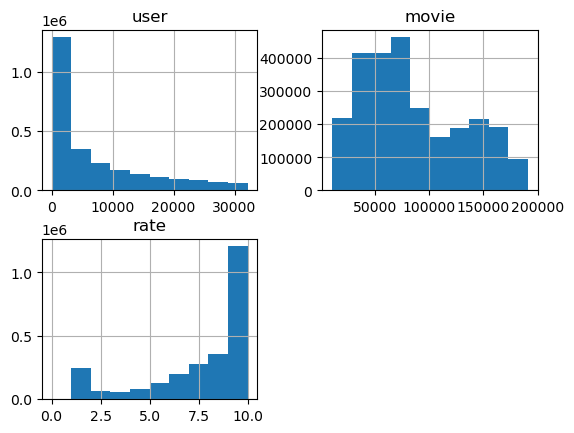

In [21]:
rating_df[['user','movie','rate']].hist()

In [26]:
stats_df = rating_df.groupby('user').agg({'movie':'count', 'rate':['mean','std']}).reset_index()
stats_df.columns = ['user', 'movie_cnt','rate_avg','rate_std']
stats_df.head()

,user,movie_cnt,rate_avg,rate_std
0,0,9990,4.741742,2.211232
1,1,9452,5.759099,2.101349
2,2,8604,7.367387,3.331778
3,3,8327,4.871502,2.668949
4,4,6999,5.038720,1.981282


In [27]:
stats_df.sort_values(by='movie_cnt', ascending=False)

,user,movie_cnt,rate_avg,rate_std
0,0,9990,4.741742,2.211232
1,1,9452,5.759099,2.101349
2,2,8604,7.367387,3.331778
3,3,8327,4.871502,2.668949
4,4,6999,5.038720,1.981282
...,...,...,...,...
31131,31131,20,8.700000,2.341839
31130,31130,20,7.800000,1.472556
31129,31129,20,7.600000,3.439706
31128,31128,20,5.600000,4.057482


In [30]:
stats_df['movie_cnt'].describe()

count    32151.000000
mean        81.322416
std        205.094160
min         20.000000
25%         26.000000
50%         39.000000
75%         71.000000
max       9990.000000
Name: movie_cnt, dtype: float64

count    341.000000
mean       8.903226
std        1.706223
min        1.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: rate, dtype: float64


<Axes: >

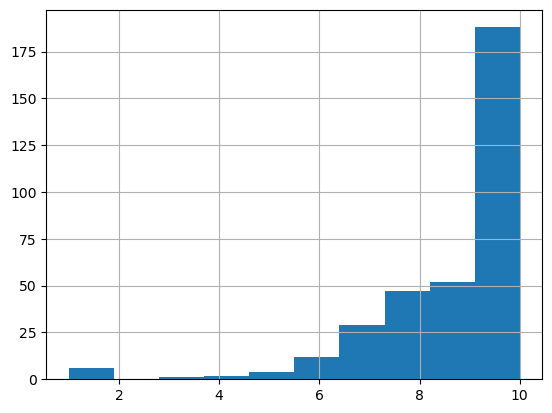

In [35]:
# rating distribution for a movie
print(rating_df[rating_df['movie']==10005]['rate'].describe())
rating_df[rating_df['movie']==10005]['rate'].hist()